In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, KFold

# Carregando as variáveis train e validation do dataset UNSW Train50

In [59]:
import pickle

In [60]:
with open('df_unsw_train50_no_preprocessing_labelencoder', mode = 'rb') as f:
    X_train50_train, X_train50_test, y_train50_multiclass_train, y_train50_multiclass_test, y_train50_binary_train, y_train50_binary_test = pickle.load(f)

In [61]:
print('X treino = ', X_train50_train.shape)
print('X teste = ', X_train50_test.shape)
print('y multiclasse treino = ', y_train50_multiclass_train.shape)
print('y multiclasse teste = ', y_train50_multiclass_test.shape)
print('y binário treino = ', y_train50_binary_train.shape)
print('y binário teste = ', y_train50_binary_test.shape)

X treino =  (889011, 47)
X teste =  (381005, 47)
y multiclasse treino =  (889011,)
y multiclasse teste =  (381005,)
y binário treino =  (889011,)
y binário teste =  (381005,)


In [62]:
y_train50_binary_train.value_counts()

0    776437
1    112574
Name: Label_binary, dtype: int64

In [63]:
y_train50_multiclass_train.value_counts()

Benign            776437
Generic            75438
Exploits           15636
Fuzzers             8501
DoS                 5679
Reconnaissance      4965
Analysis             928
Backdoor             822
Shellcode            544
Worms                 61
Name: Label_multiclass, dtype: int64

In [64]:
y_train50_binary_test.value_counts()

0    332943
1     48062
Name: Label_binary, dtype: int64

In [65]:
y_train50_multiclass_test.value_counts()

Benign            332943
Generic            32302
Exploits            6626
Fuzzers             3621
DoS                 2497
Reconnaissance      2028
Analysis             410
Backdoor             342
Shellcode            211
Worms                 25
Name: Label_multiclass, dtype: int64

In [66]:
X_train50_train.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src__ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
1126124,38,63740,23,62606,114,5,1.004882,1580,10168,31,...,6.0,0.0,0,15,8,10,22,6,6,6
1202977,40,20344,22,50874,114,5,0.357506,2542,23508,31,...,7.0,3.0,7,6,7,6,5,1,1,2
39741,41,3394,20,61478,114,5,28.539139,36970,1641360,31,...,0.0,0.0,0,9,6,4,4,3,1,3
156053,38,53118,26,25911,114,5,0.512517,8928,320,31,...,0.0,0.0,0,9,3,3,8,2,1,2
1230603,37,58507,27,16512,114,5,0.045381,37500,3380,31,...,0.0,0.0,0,1,1,1,4,1,1,1


In [67]:
print(y_train50_multiclass_train.unique())
print(y_train50_binary_train.unique())

['Benign' 'DoS' 'Generic' 'Fuzzers' 'Analysis' 'Exploits' 'Reconnaissance'
 'Shellcode' 'Backdoor' 'Worms']
[0 1]


In [68]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [69]:
X_train50_train = X_train50_train.to_numpy()
y_train50_multiclass_train = y_train50_multiclass_train.to_numpy()
y_train50_binary_train = y_train50_binary_train.to_numpy()
X_train50_test = X_train50_test.to_numpy()
y_train50_multiclass_test = y_train50_multiclass_test.to_numpy()
y_train50_binary_test = y_train50_binary_test.to_numpy()

In [70]:
print(type(X_train50_train))
print(type(y_train50_multiclass_train))
print(type(y_train50_binary_train))
print(type(X_train50_test))
print(type(y_train50_multiclass_test))
print(type(y_train50_binary_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Carregando as variáveis do dataset UNSW Test50

In [71]:
import pickle

In [72]:
with open('df_unsw_test50_no_preprocessing_labelencoder', mode = 'rb') as f:
    X_test50, y_test50_multiclass, y_test50_binary = pickle.load(f)

In [73]:
print('X = ', X_test50.shape)
print('y multiclasse = ', y_test50_multiclass.shape)
print('y binário = ', y_test50_binary.shape)

X =  (1270018, 47)
y multiclasse =  (1270018,)
y binário =  (1270018,)


In [74]:
y_test50_multiclass.value_counts()

Benign            1109380
Generic            107740
Exploits            22262
Fuzzers             12123
DoS                  8176
Reconnaissance       6993
Analysis             1338
Backdoor             1164
Shellcode             755
Worms                  87
Name: Label_multiclass, dtype: int64

In [75]:
y_test50_binary.value_counts()

0    1109380
1     160638
Name: Label_binary, dtype: int64

In [76]:
X_test50.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src__ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm
0,35,42325,21,39962,114,5,0.039096,2974,31328,31,...,7.0,3.0,7,8,8,6,3,1,1,10
1,35,15576,22,63617,114,5,0.009790,424,8824,31,...,7.0,3.0,7,3,3,5,6,1,1,4
2,33,14173,27,12006,114,5,0.008764,2230,14740,31,...,7.0,3.0,7,2,3,1,3,1,1,1
3,38,33848,25,62606,114,5,1.036823,1580,10168,31,...,1.0,3.0,7,1,1,3,3,1,1,2
4,42,12229,21,12108,114,5,0.872706,2934,3740,31,...,7.0,1.0,1,1,1,2,3,1,1,4


In [77]:
print(y_test50_multiclass.unique())
print(y_test50_binary.unique())

['Benign' 'DoS' 'Fuzzers' 'Generic' 'Exploits' 'Shellcode'
 'Reconnaissance' 'Analysis' 'Backdoor' 'Worms']
[0 1]


In [78]:
#X_test50.shape

In [79]:
# verifica detalhes das variáveis
# variáveis nominais: #proto #state #service #ct_ftp_cmd
#df_unsw_full.shape
#df_unsw_full.describe()
#df_unsw_full.dtypes
#y_test50_multiclass.value_counts()
#np.unique(df_unsw_full['sport'])
#len(np.unique(df_unsw_full.ct_ftp_cmd))

In [80]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [81]:
X_test50 = X_test50.to_numpy()
y_test50_multiclass = y_test50_multiclass.to_numpy()
y_test50_binary = y_test50_binary.to_numpy()

In [82]:
print(type(X_test50))
print(type(y_test50_multiclass))
print(type(y_test50_binary))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Algoritmo LightBGM para Train e Validation - Train50

In [83]:
import lightgbm as lgb

### Predição train50 binária

In [84]:
lgb_train50_binary = lgb.LGBMClassifier(objective='binary', n_estimators=100, max_depth=8, random_state=42)

In [85]:
lgb_train50_binary.fit(X_train50_train, y_train50_binary_train)

LGBMClassifier(max_depth=8, objective='binary', random_state=42)

In [29]:
predict_train50_binary = lgb_train50_binary.predict(X_train50_test)

In [30]:
predict_train50_binary

array([1, 0, 0, ..., 0, 0, 0])

In [31]:
y_train50_binary_test

array([1, 0, 0, ..., 0, 0, 0])

In [32]:
accuracy_score(y_train50_binary_test, predict_train50_binary)

0.998658810251834

### Visualização da árvore binária

In [33]:
from sklearn import tree
#from dtreeviz.trees import dtreeviz
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [34]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_binary.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [35]:
#viz = dtreeviz(xgb_train50_binary.estimators_[0], X_train50_train, y_train50_binary_train, feature_names=X_train50_train.columns, target_name='Label_binary')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

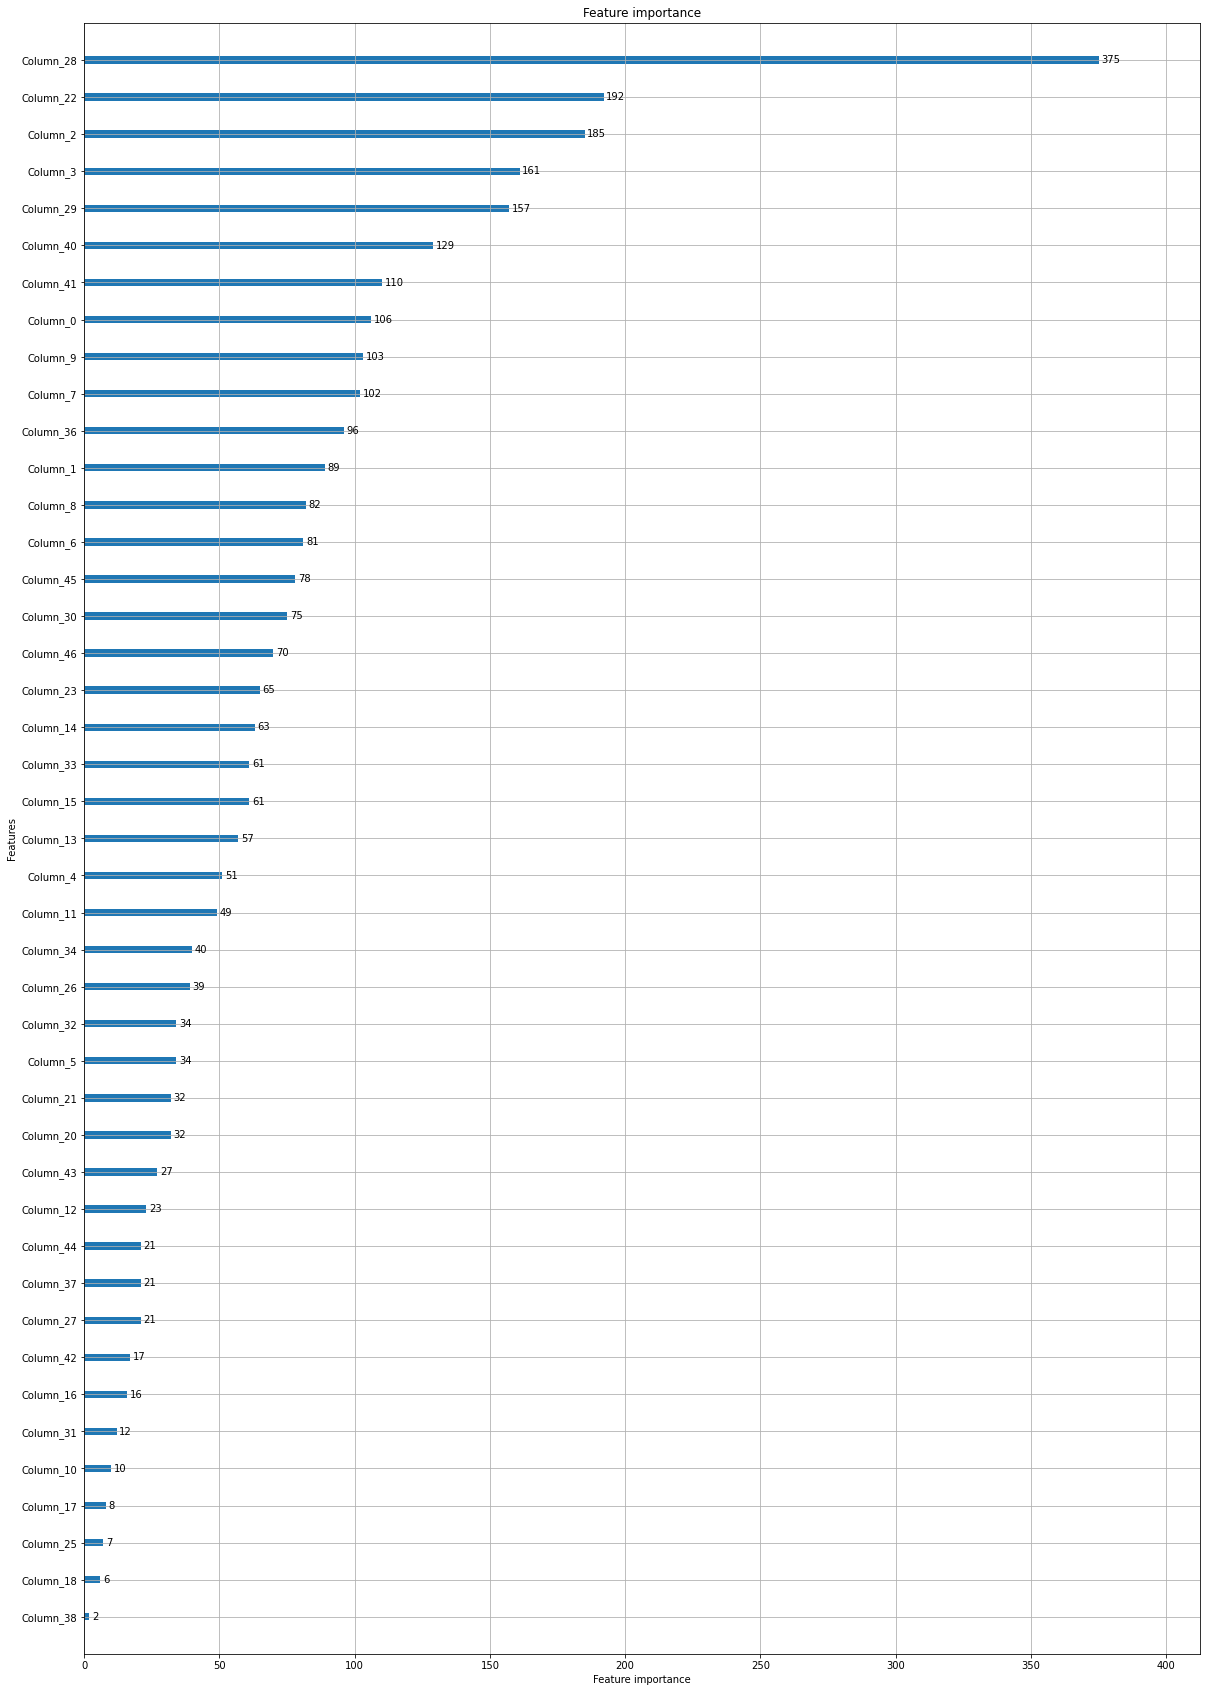

In [36]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

### Predição train50 multiclasse

In [86]:
lgb_train50_multiclass = lgb.LGBMClassifier(objective='multiclass', n_estimators=100, max_depth=8, random_state=42)

In [87]:
lgb_train50_multiclass.fit(X_train50_train, y_train50_multiclass_train)

LGBMClassifier(max_depth=8, objective='multiclass', random_state=42)

In [39]:
predict_train50_multiclass = lgb_train50_multiclass.predict(X_train50_test)

In [40]:
predict_train50_multiclass

array(['Generic', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [41]:
y_train50_multiclass_test

array(['Generic', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [42]:
accuracy_score(y_train50_multiclass_test, predict_train50_multiclass)

0.9767824569231375

### Visualização da árvore multiclasse

In [43]:
#plt.figure(figsize=(20,10))
#grafic = tree.plot_tree(xgb_train50_multiclass.estimators_[0], feature_names=X_train50_train.columns, filled=True)

In [44]:
#viz = dtreeviz(xgb_train50_multiclass.estimators_[0], X_train50_train, y_train50_multiclass_train, feature_names=X_train50_train.columns, target_name='Label_multiclass')
#viz

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

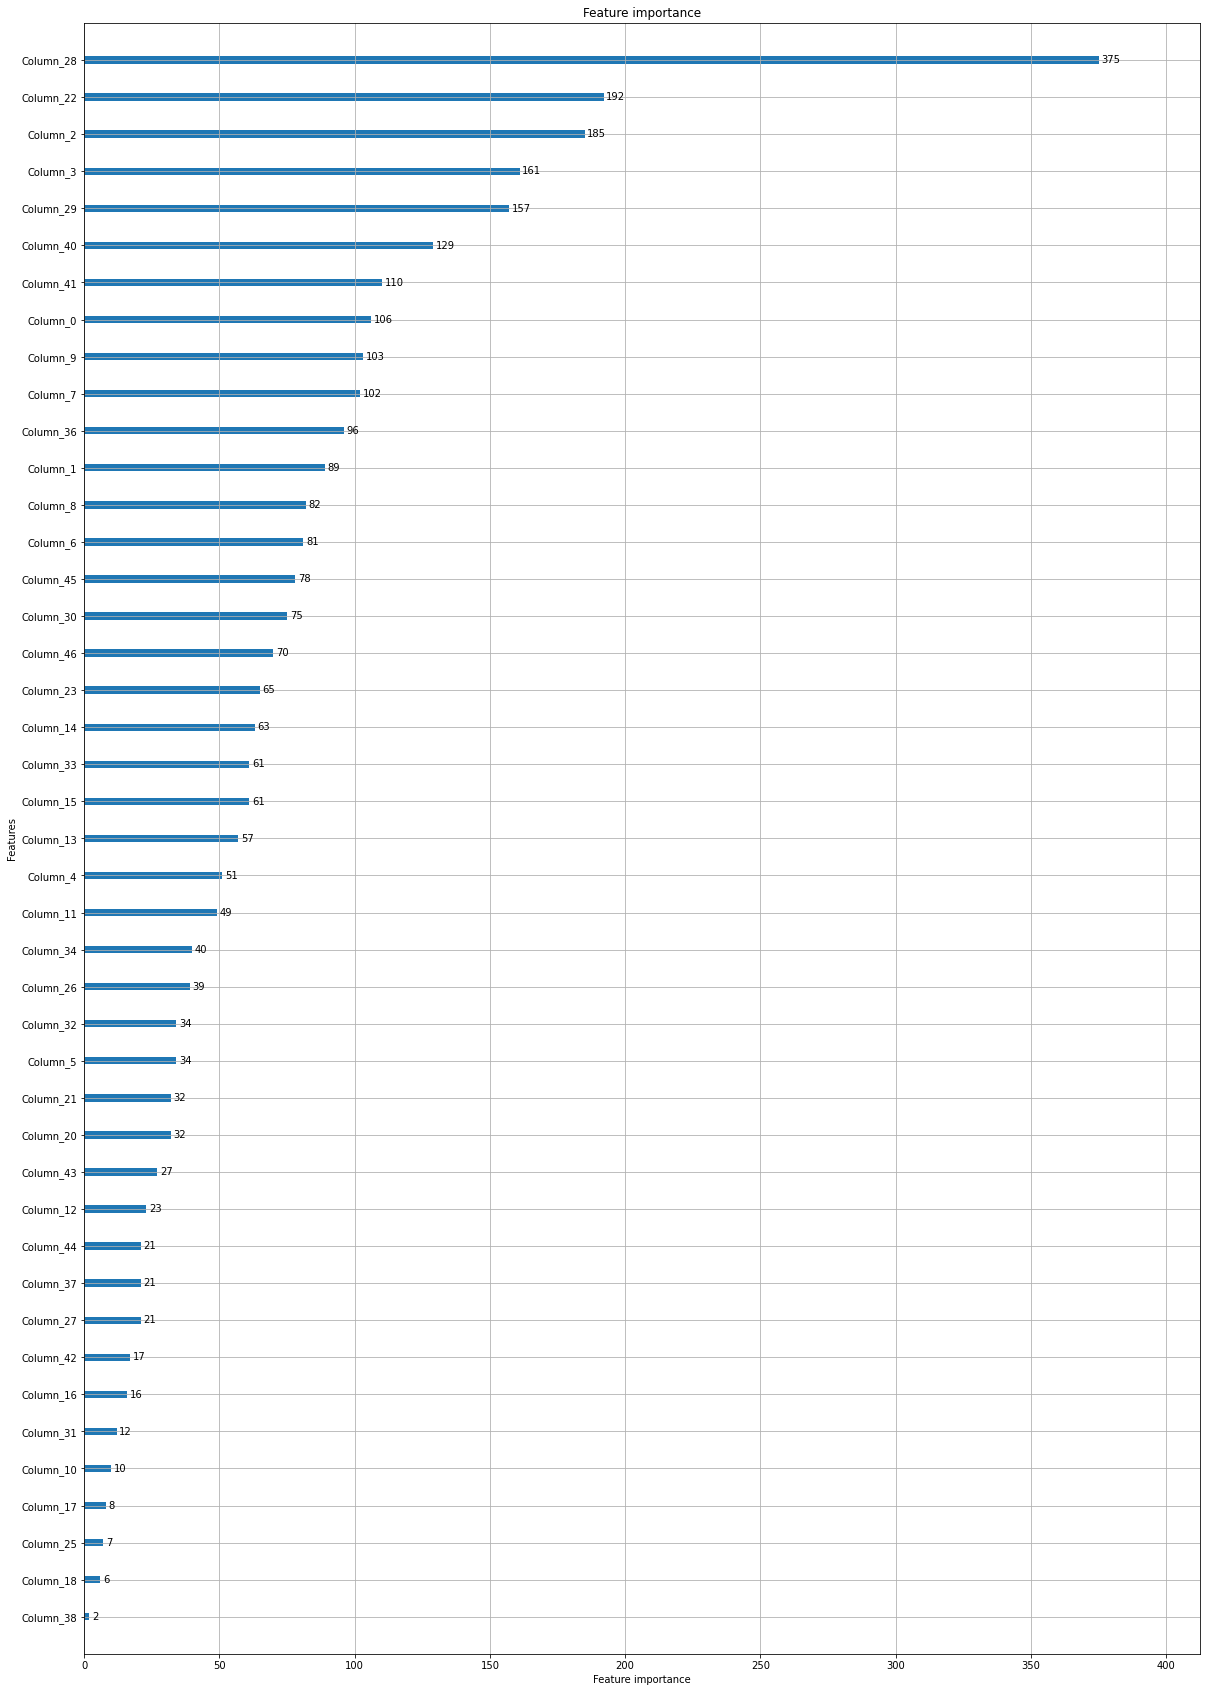

In [45]:
fig, ax = plt.subplots(figsize=(20,30))
lgb.plot_importance(lgb_train50_binary, ax=ax)

In [46]:
#lgb.plot_tree(lgb_train50_binary, figsize=(20,6), tree_index=0, dpi=100)

### Precision e Recall do train50

In [47]:
print(classification_report(y_train50_binary_test, predict_train50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   0.999408  0.999057  0.999232    332943
           1   0.993483  0.995901  0.994690     48062

    accuracy                       0.998659    381005
   macro avg   0.996445  0.997479  0.996961    381005
weighted avg   0.998661  0.998659  0.998660    381005



In [48]:
print(classification_report(y_train50_multiclass_test, predict_train50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.053864  0.056098  0.054958       410
      Backdoor   0.035063  0.146199  0.056561       342
        Benign   0.997298  0.997621  0.997459    332943
           DoS   0.311251  0.218262  0.256591      2497
      Exploits   0.589801  0.638847  0.613345      6626
       Fuzzers   0.645384  0.594587  0.618945      3621
       Generic   0.986660  0.977679  0.982149     32302
Reconnaissance   0.787929  0.701677  0.742306      2028
     Shellcode   0.000000  0.000000  0.000000       211
         Worms   0.000000  0.000000  0.000000        25

      accuracy                       0.976782    381005
     macro avg   0.440725  0.433097  0.432231    381005
  weighted avg   0.977857  0.976782  0.977194    381005



### Cross Validation do train50

In [49]:
# cross validation binary
cv_result_train50_binary = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_binary = cross_val_score(lgb_train50_binary, X_train50_train, y_train50_binary_train, cv=kfold)
cv_result_train50_binary.append(score_cv_train50_binary.mean())

In [50]:
score_cv_train50_binary

array([0.99884142, 0.99875142, 0.99862769, 0.99865018, 0.99872892,
       0.99874017, 0.9988639 , 0.99859394, 0.99871767, 0.99863894])

In [51]:
cv_result_train50_binary

[0.9987154263265644]

In [52]:
# cross validation multiclass
cv_result_train50_multiclass = []
kfold = KFold(n_splits=10, shuffle=True, random_state=42)   
score_cv_train50_multiclass = cross_val_score(lgb_train50_multiclass, X_train50_train, y_train50_multiclass_train, cv=kfold)
cv_result_train50_multiclass.append(score_cv_train50_multiclass.mean())

In [53]:
score_cv_train50_multiclass

array([0.97975299, 0.97767179, 0.97967402, 0.98111382, 0.97988774,
       0.96376869, 0.97947155, 0.97852668, 0.97964027, 0.97185633])

In [54]:
cv_result_train50_multiclass

[0.9771363879450327]

### Matriz de Confusão do train50

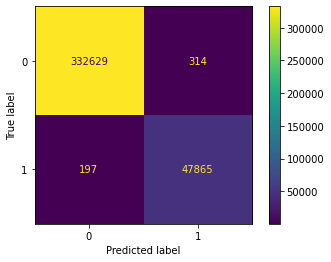

In [55]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_train50_test, y_train50_binary_test)
plt.show()

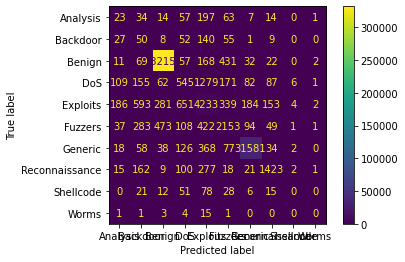

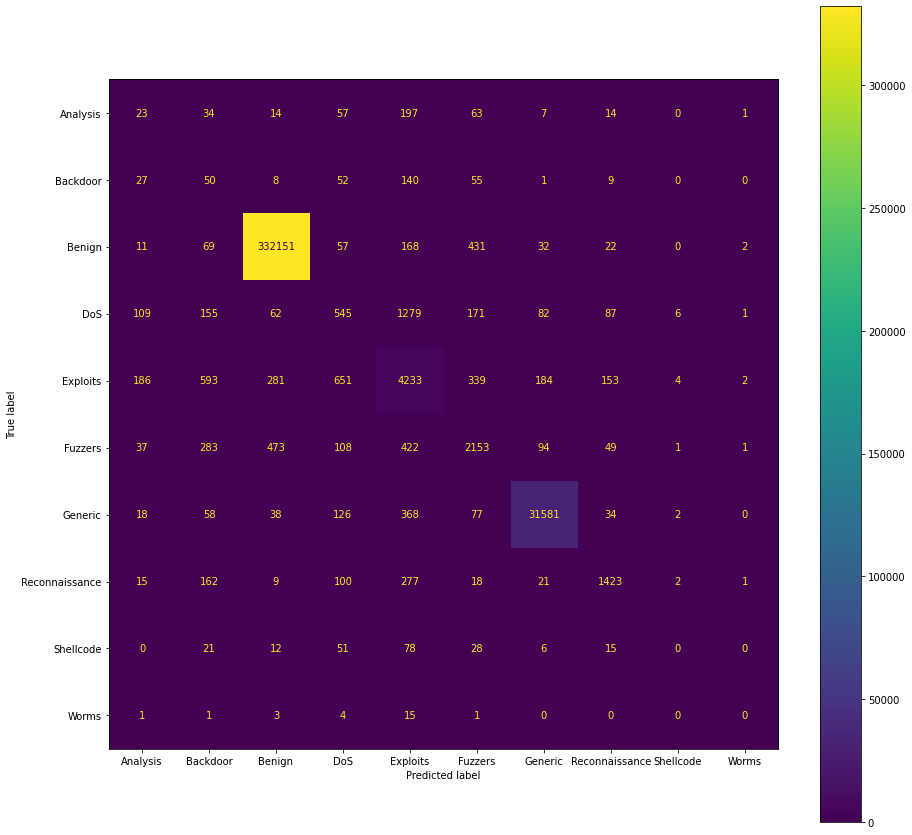

In [56]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_train50_test, y_train50_multiclass_test)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)

# Algoritmo LightBGM para Test50

### Predição Test50 binária

In [88]:
predict_test50_binary = lgb_train50_binary.predict(X_test50)

In [89]:
predict_test50_binary

array([0, 0, 0, ..., 0, 0, 1])

In [90]:
y_test50_binary

array([0, 0, 0, ..., 0, 0, 0])

In [91]:
accuracy_score(y_test50_binary, predict_test50_binary)

0.8153774198475927

### Predição test50 multiclasse

In [92]:
predict_test50_multiclass = lgb_train50_multiclass.predict(X_test50)

In [93]:
predict_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Generic'],
      dtype=object)

In [94]:
y_test50_multiclass

array(['Benign', 'Benign', 'Benign', ..., 'Benign', 'Benign', 'Benign'],
      dtype=object)

In [95]:
accuracy_score(y_test50_multiclass, predict_test50_multiclass)

0.8593366393232222

### Precision e Recall do test50

In [96]:
print(classification_report(y_test50_binary, predict_test50_binary, digits=6, zero_division=1))

              precision    recall  f1-score   support

           0   1.000000  0.788644  0.881835   1109380
           1   0.406563  1.000000  0.578094    160638

    accuracy                       0.815377   1270018
   macro avg   0.703282  0.894322  0.729965   1270018
weighted avg   0.924939  0.815377  0.843416   1270018



In [97]:
print(classification_report(y_test50_multiclass, predict_test50_multiclass, digits=6, zero_division=1))

                precision    recall  f1-score   support

      Analysis   0.029806  0.014948  0.019910      1338
      Backdoor   0.005464  0.001718  0.002614      1164
        Benign   0.987697  0.871270  0.925838   1109380
           DoS   0.062353  0.039017  0.047999      8176
      Exploits   0.489242  0.375887  0.425138     22262
       Fuzzers   0.201166  0.706013  0.313115     12123
       Generic   0.475090  0.975487  0.638979    107740
Reconnaissance   0.610372  0.314743  0.415322      6993
     Shellcode   0.305990  0.311258  0.308601       755
         Worms   0.000000  0.000000  0.000000        87

      accuracy                       0.859337   1270018
     macro avg   0.316718  0.361034  0.309752   1270018
  weighted avg   0.917548  0.859337  0.876184   1270018



### Matriz de Confusão do test50

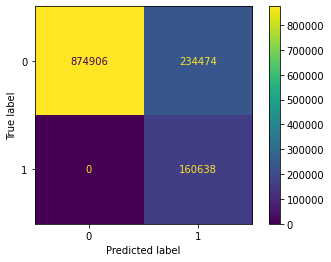

In [98]:
ConfusionMatrixDisplay.from_estimator(lgb_train50_binary, X_test50, y_test50_binary)
plt.show()

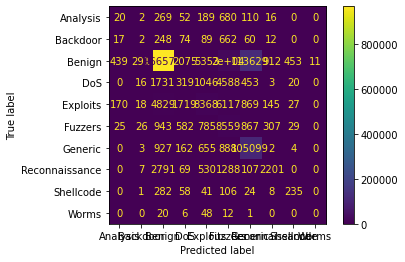

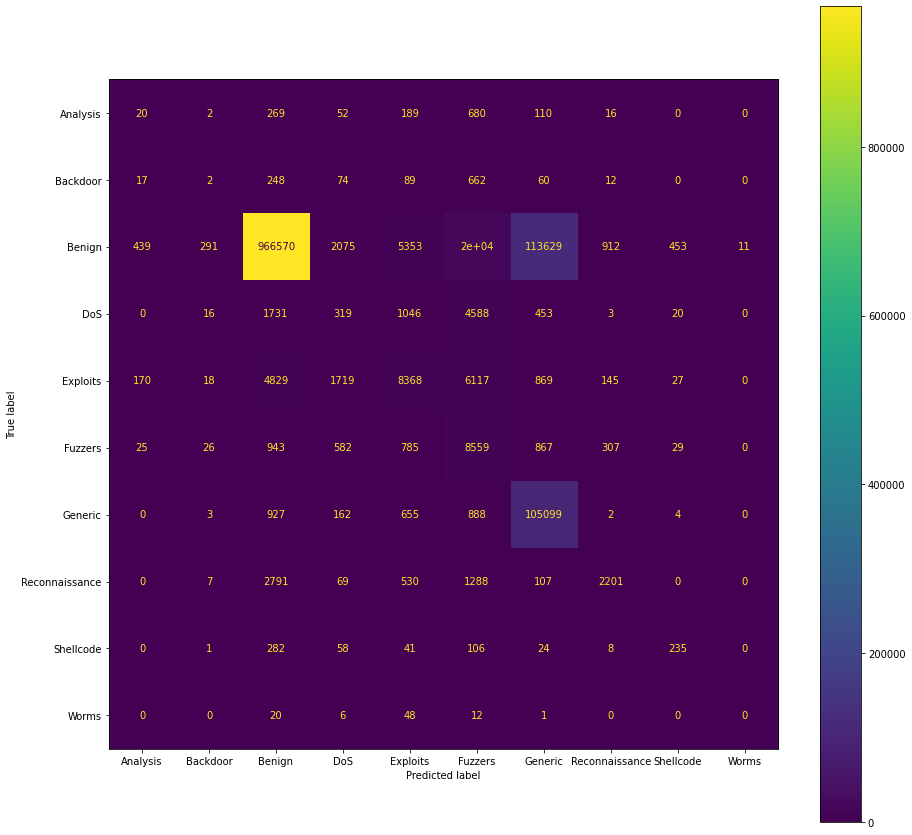

In [99]:
#ConfusionMatrixDisplay.from_estimator(xgb_train50_multiclass, X_test50, y_test50_multiclass)
#plt.show()

cm_lgb_multiclass_train = ConfusionMatrixDisplay.from_estimator(lgb_train50_multiclass, X_test50, y_test50_multiclass)
fig, ax = plt.subplots(figsize=(15,15))
cm_lgb_multiclass_train.plot(ax=ax)